# Laboratorio 5 Termodinámica y Teoría cinética

# Ley de Stefan-Boltzmann (Baja temperatura)

Si el detector en el sensor de radiación opera a la temperatura del cero absoluto (0 K), se producirá eventualmente un voltaje directamente proporcional a la intensidad de la radiación que incide. Sin embargo, el detector no está a la temperatura del cero absoluto, así que también está irradiando energía térmica el detector mismo. Según la ley de Stefan-Boltzmann, irradia a una razón:

$$R_{det} = sT^{4}_{det}$$

El voltaje producido por el sensor es proporcional a la radiación incidente en el detector menos la radiación emitida. Matemáticamente la radiación neta del sensor o el voltaje producido por el sensor de radiación es proporcional a

$$R_{net} = R_{rad} - R_{det} = s(T^{4} - T^{4}_{det})$$

Cuando realizamos el experimento, debemos registrar $R_{amb}$, la resistencia del termistor a temperatura ambiente.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import astropy.constants as const
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from scipy.optimize import curve_fit

In [2]:
t_amb = 22 + 273#  Medimos la temperatura con termocupla

## Tabla de conversión de resistencias a temperatura

In [3]:
resistencias = pd.read_csv('tabla_resistencias.csv', sep=';')
resistencias

,Resistencia (Ohm),Temperatura (°C)
0,79422.0,30
1,72560.0,32
2,66356.0,34
3,60743.0,36
4,55658.0,38
5,51048.0,40
6,46863.0,42
7,43062.0,44
8,39605.0,46
9,36458.0,48


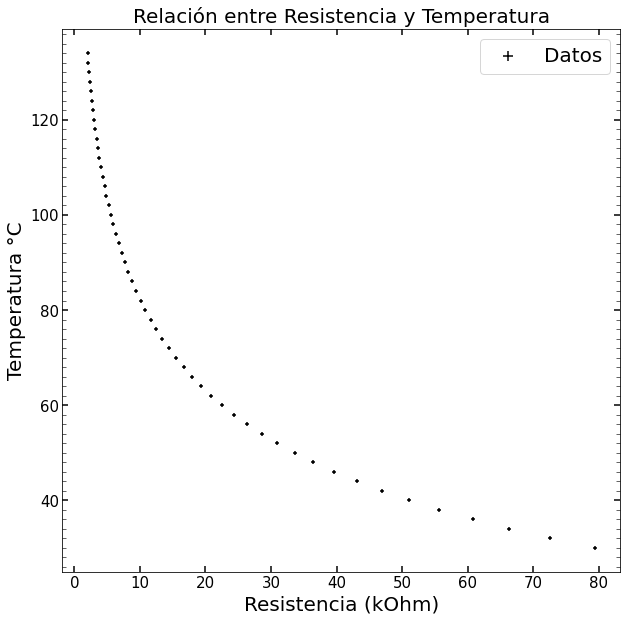

In [4]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(resistencias['Resistencia (Ohm)'] / 1000, resistencias['Temperatura (°C)'], marker='+', color='black', s=10, label='Datos')
ax.set_title('Relación entre Resistencia y Temperatura', fontsize=20)
ax.set_xlabel('Resistencia (kOhm)', fontsize=20)
ax.set_ylabel('Temperatura °C', fontsize=20)
ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
              length=6, width=1.5, grid_color='black', grid_alpha=1)

ax.xaxis.set_minor_locator(MultipleLocator(1500))
ax.yaxis.set_minor_locator(MultipleLocator(2))
ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True)
ax.legend(fontsize=20, markerscale=3)

In [5]:
def modelo(resistencias, A, B, C):
    return (B / (np.log(resistencias/A))) + C

In [6]:
popt, pcov = curve_fit(modelo, resistencias['Resistencia (Ohm)'], resistencias['Temperatura (°C)'])
popt

array([ 6.41389225e-03,  5.88312630e+03, -3.30251512e+02])

In [7]:
def modelo_ajuste(resistencias, ajuste):
    return ajuste[1] / (np.log(resistencias/ajuste[0])) + ajuste[2]

In [8]:
res_linspace = np.linspace(min(resistencias['Resistencia (Ohm)']), max(resistencias['Resistencia (Ohm)']), 100)

In [9]:
def temp_res(temp, A, B, C):
    return A * np.exp(B/ (temp - C))

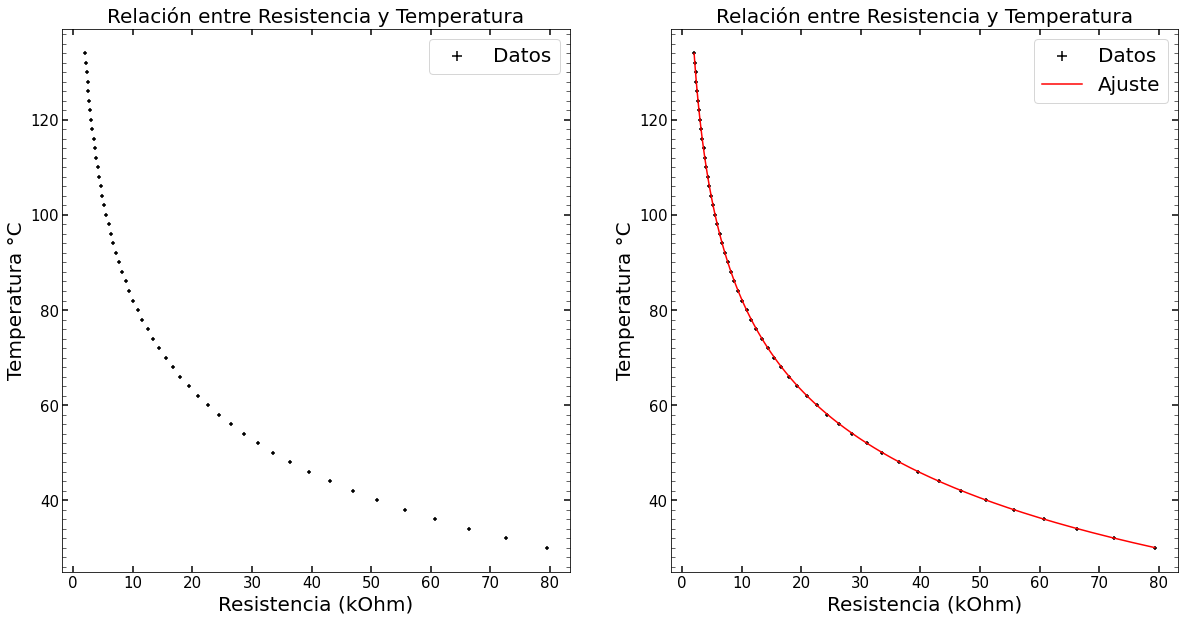

In [10]:
temp_linspace = np.linspace(min(resistencias['Temperatura (°C)']), max(resistencias['Temperatura (°C)']), 100)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.scatter(resistencias['Resistencia (Ohm)'] / 1000, resistencias['Temperatura (°C)'], marker='+', color='black', s=10, label='Datos')
ax1.set_title('Relación entre Resistencia y Temperatura', fontsize=20)
ax1.set_xlabel('Resistencia (kOhm)', fontsize=20)
ax1.set_ylabel('Temperatura °C', fontsize=20)
ax1.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
              length=6, width=1.5, grid_color='black', grid_alpha=1)

ax1.xaxis.set_minor_locator(MultipleLocator(1500))
ax1.yaxis.set_minor_locator(MultipleLocator(2))
ax1.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True)
ax1.legend(fontsize=20, markerscale=3)

ax2.scatter(resistencias['Resistencia (Ohm)'] / 1000, resistencias['Temperatura (°C)'], marker='+', color='black', s=10, label='Datos')
ax2.plot(temp_res(temp_linspace, popt[0], popt[1], popt[2]) / 1000, temp_linspace, c='red', label='Ajuste')
ax2.set_title('Relación entre Resistencia y Temperatura', fontsize=20)
ax2.set_xlabel('Resistencia (kOhm)', fontsize=20)
ax2.set_ylabel('Temperatura °C', fontsize=20)
ax2.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
              length=6, width=1.5, grid_color='black', grid_alpha=1)

ax2.xaxis.set_minor_locator(MultipleLocator(1500))
ax2.yaxis.set_minor_locator(MultipleLocator(2))
ax2.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True)
ax2.legend(fontsize=20, markerscale=3)

Podemos convertir Resistencia (Ohm) a Temperatura (°C) o viceversa a través de los modelos:

$$T = \frac{B}{ln(\frac{R}{A})} + C$$

$$R = A \cdot e^{\frac{B}{T - C}}$$

Donde:
- T: Temperatura (°C)
- R: Resistencia (Ohm)
- A = 6.41389225e-03
- B = 5.88312630e+03
- C = -3.30251512e+02

Los valores de A, B y C fueron calculados haciendo un ajuste a través del método $\textit{curve\textunderscore fit()}$ de la librería $\textit{scipy.optimize}$

In [11]:
t1 = temp_res(t_amb + 12, popt[0], popt[1], popt[2])
t1

65.54539460197095

## Comparación entre Rad y $T_{k}^4 - T_{amb}^4$

A través de la ecuación de Stefan-Boltzmann sabemos que:

$$E = \sigma (T_{k}^4 - T_{amb}^4) $$

Compararemos este modelo con la distribución de nuestros datos para comprobar si su relación es lineal, y de comprobarse esto, ver si la constante $\sigma$ se acerca al valor real de la constante de Stefan-Boltzmann.

### Cara negra

In [12]:
res_max = 3795
temp_max = modelo_ajuste(res_max, popt)

lista_temp = []

for i in range(12):
    temperatura = temp_res(temp_max - (12 * i), popt[0], popt[1], popt[2])
    lista_temp.append(temperatura)
    if temp_max - 12*i > 0:
        print('T: {} °C, Resistencia = {} Ohm'.format(
            temp_max - 12*i, temperatura))

T: 112.39737902432967 °C, Resistencia = 3795.0000000000027 Ohm
T: 100.39737902432967 °C, Resistencia = 5496.049700287615 Ohm
T: 88.39737902432967 °C, Resistencia = 8130.363757639147 Ohm
T: 76.39737902432967 °C, Resistencia = 12308.525470431487 Ohm
T: 64.39737902432967 °C, Resistencia = 19109.721639606312 Ohm
T: 52.397379024329666 °C, Resistencia = 30498.984221488558 Ohm
T: 40.397379024329666 °C, Resistencia = 50172.17322260016 Ohm
T: 28.397379024329666 °C, Resistencia = 85330.9497012303 Ohm
T: 16.397379024329666 °C, Resistencia = 150563.15358443954 Ohm
T: 4.397379024329666 °C, Resistencia = 276705.0574263856 Ohm


In [13]:
datos_cara_negra = pd.read_csv('datos_cara_negra.csv', sep=';').sort_values(by=['Rad'], ascending=True)
datos_cara_negra

,Rad,R (kOhm),Tc,Tk,Tk^4,Tk^4 - Tamb^4
0,1.3,67.000,33.0,NaN,NaN,NaN
7,2.8,42.700,NaN,NaN,NaN,NaN
6,4.2,30.400,NaN,NaN,NaN,NaN
5,6.2,19.500,NaN,NaN,NaN,NaN
4,8.8,12.300,NaN,NaN,NaN,NaN
3,11.6,8.150,NaN,NaN,NaN,NaN
2,14.8,5.490,NaN,NaN,NaN,NaN
1,18.2,3.795,NaN,NaN,NaN,NaN


In [14]:
datos_cara_negra['Tc'] = modelo_ajuste(datos_cara_negra['R (kOhm)'] * 1000, popt)
datos_cara_negra['Tk'] = datos_cara_negra['Tc'] + 273
datos_cara_negra['Tk^4'] = datos_cara_negra['Tk'] ** 4
datos_cara_negra['Tk^4 - Tamb^4'] = datos_cara_negra['Tk^4'] - (t_amb ** 4)
datos_cara_negra

,Rad,R (kOhm),Tc,Tk,Tk^4,Tk^4 - Tamb^4
0,1.3,67.000,33.764209,306.764209,8.855616e+09,1.282265e+09
7,2.8,42.700,44.201753,317.201753,1.012377e+10,2.550420e+09
6,4.2,30.400,52.478302,325.478302,1.122246e+10,3.649112e+09
5,6.2,19.500,63.862879,336.862879,1.287694e+10,5.303588e+09
4,8.8,12.300,76.416856,349.416856,1.490649e+10,7.333140e+09
3,11.6,8.150,88.325527,361.325527,1.704490e+10,9.471554e+09
2,14.8,5.490,100.432100,373.432100,1.944673e+10,1.187338e+10
1,18.2,3.795,112.397379,385.397379,2.206150e+10,1.448815e+10


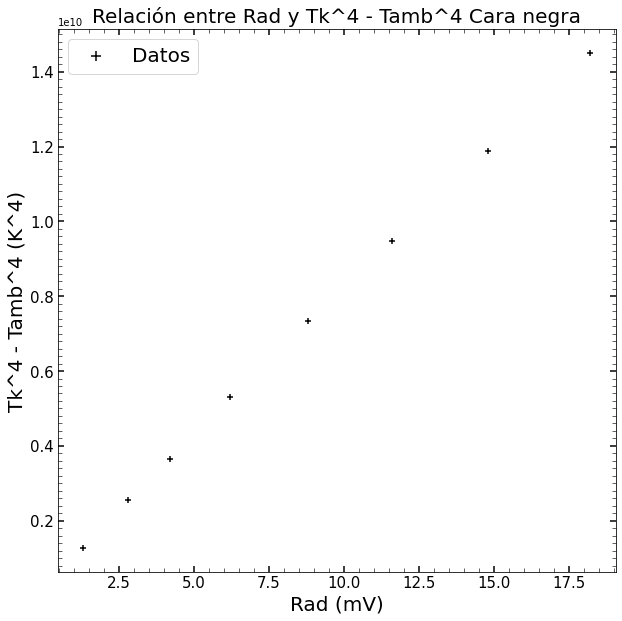

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(datos_cara_negra['Rad'], datos_cara_negra['Tk^4 - Tamb^4'], marker='+', color='black', s=30, label='Datos')
ax.set_title('Relación entre Rad y Tk^4 - Tamb^4 Cara negra', fontsize=20)
ax.set_xlabel('Rad (mV)', fontsize=20)
ax.set_ylabel('Tk^4 - Tamb^4 (K^4)', fontsize=20)
ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
              length=6, width=1.5, grid_color='black', grid_alpha=1)

ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(MultipleLocator(200000000))
ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True)
ax.legend(fontsize=20, markerscale=2)

In [65]:
def ajuste_recta(T4, S):
    return S * T4

ajuste_cn, _ = curve_fit(ajuste_recta, datos_cara_negra['Tk^4 - Tamb^4'], datos_cara_negra['Rad'])
ajuste_cn

array([1.23322748e-09])

In [66]:
def boltzmann_mv_w(boltzmann):  #  Convierte el valor encontrado para la constante de boltzmann de mV a W
    return np.round((boltzmann / 22) * 1000, 12)

def error_boltzmann_exp_teo(b_exp, b_teo):  #  Calcular el error porcentual entre 
    return (np.abs(b_teo - b_exp) * 100) / b_teo

print('Valor encontrado para la constante de boltzmann con los datos de la cara negra: {} W/m^2 K^4'.format(
    boltzmann_mv_w(ajuste_cn)[0]))
print('Error porcentual entre el valor encontrado y el teórico: {}%'.format(
    round(error_boltzmann_exp_teo(boltzmann_mv_w(ajuste_cn), const.sigma_sb.value)[0], 3)
))

Valor encontrado para la constante de boltzmann con los datos de la cara negra: 5.6056e-08 W/m^2 K^4
Error porcentual entre el valor encontrado y el teórico: 1.142%


1 mW = 22 mV

In [67]:
def recta(T4, ajuste):
    return ajuste * T4

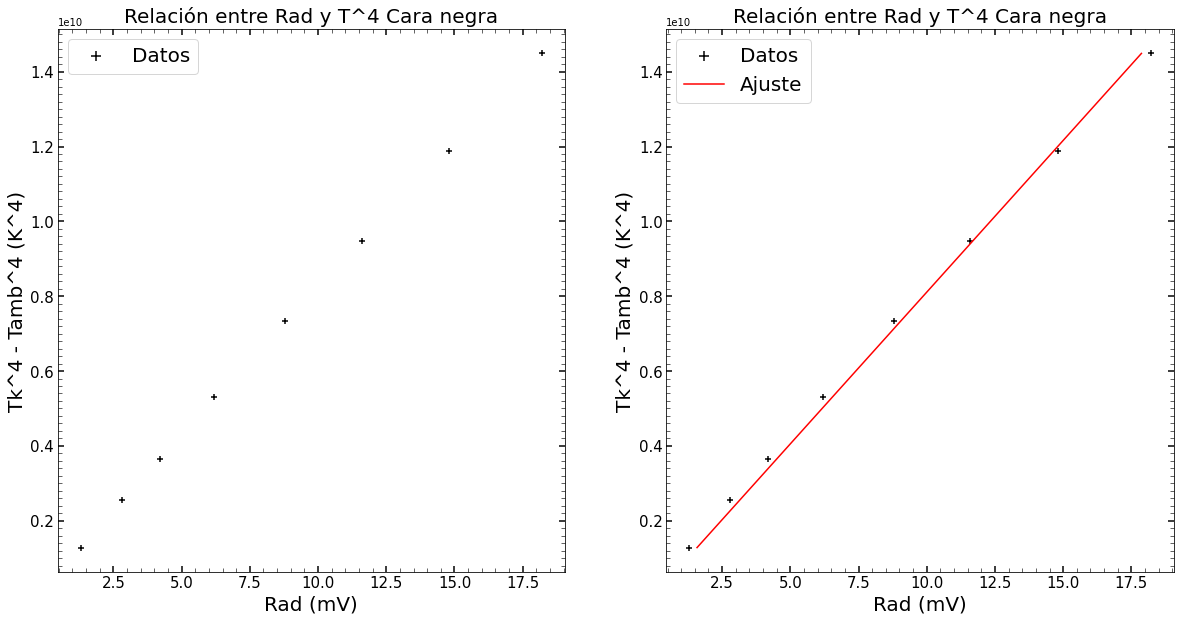

In [68]:
temp_linspace = np.linspace(min(datos_cara_negra['Tk^4 - Tamb^4']), max(datos_cara_negra['Tk^4 - Tamb^4']), 100)

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax.scatter(datos_cara_negra['Rad'], datos_cara_negra['Tk^4 - Tamb^4'], marker='+', color='black', s=30, label='Datos')
ax.set_title('Relación entre Rad y T^4 Cara negra', fontsize=20)
ax.set_xlabel('Rad (mV)', fontsize=20)
ax.set_ylabel('Tk^4 - Tamb^4 (K^4)', fontsize=20)
ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
              length=6, width=1.5, grid_color='black', grid_alpha=1)

ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(MultipleLocator(200000000))
ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True)
ax.legend(fontsize=20, markerscale=2)

ax2.scatter(datos_cara_negra['Rad'], datos_cara_negra['Tk^4 - Tamb^4'], marker='+', color='black', s=30, label='Datos')
ax2.plot(recta(temp_linspace, ajuste_cn), temp_linspace,c='red', label='Ajuste')
ax2.set_title('Relación entre Rad y T^4 Cara negra', fontsize=20)
ax2.set_xlabel('Rad (mV)', fontsize=20)
ax2.set_ylabel('Tk^4 - Tamb^4 (K^4)', fontsize=20)
ax2.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
              length=6, width=1.5, grid_color='black', grid_alpha=1)

ax2.xaxis.set_minor_locator(MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(MultipleLocator(200000000))
ax2.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True)
ax2.legend(fontsize=20, markerscale=2)

In [69]:
spear1 = stats.spearmanr(datos_cara_negra['Rad'], recta(datos_cara_negra['Tk^4 - Tamb^4'], ajuste_cn))[0]
pear1 = stats.pearsonr(datos_cara_negra['Rad'], recta(datos_cara_negra['Tk^4 - Tamb^4'], ajuste_cn))[0]
print("Correlacion de Spearman: {} \nCorrelacion de Pearson: {}".format(
    spear1, pear1
))

Correlacion de Spearman: 1.0 
Correlacion de Pearson: 0.9998694989549003


La relación es exactamente lineal.

### Cara blanca

In [20]:
temp_res(45, popt[0], popt[1], popt[2])

41296.48822283149

In [70]:
res_max = 3795
temp_max = modelo_ajuste(12.35 * 1000, popt)

lista_temp_bl = []

for i in range(12):
    temperatura = temp_res(temp_max - (12 * i), popt[0], popt[1], popt[2])
    lista_temp.append(temperatura)
    if temp_max - 12*i > 0:
        print('T: {} °C, Resistencia = {} Ohm'.format(
            temp_max - 12*i, temperatura))

T: 76.30284790220418 °C, Resistencia = 12349.999999999998 Ohm
T: 64.30284790220418 °C, Resistencia = 19178.096336099676 Ohm
T: 52.30284790220418 °C, Resistencia = 30615.075605270747 Ohm
T: 40.30284790220418 °C, Resistencia = 50375.74184323087 Ohm
T: 28.302847902204178 °C, Resistencia = 85700.7817178036 Ohm
T: 16.302847902204178 °C, Resistencia = 151261.78184401503 Ohm
T: 4.302847902204178 °C, Resistencia = 278082.97454909113 Ohm


In [23]:
datos_cara_blanca = pd.read_csv('datos_cara_blanca.csv', sep=';').sort_values(by=['Rad'], ascending=True)
datos_cara_blanca

,Rad,R (kOhm),Tc,Tk,Tk^4,Tk^4 - Tamb^4
7,1.4,61.000,NaN,NaN,NaN,NaN
3,2.9,42.200,NaN,NaN,NaN,NaN
2,4.1,30.610,NaN,NaN,NaN,NaN
1,6.0,14.900,NaN,NaN,NaN,NaN
0,8.6,12.350,NaN,NaN,NaN,NaN
4,11.2,8.370,NaN,NaN,NaN,NaN
5,14.3,5.270,NaN,NaN,NaN,NaN
6,18.6,3.432,NaN,NaN,NaN,NaN


In [24]:
datos_cara_blanca['Tc'] = modelo_ajuste(datos_cara_blanca['R (kOhm)'] * 1000, popt)
datos_cara_blanca['Tk'] = datos_cara_blanca['Tc'] + 273
datos_cara_blanca['Tk^4'] = datos_cara_blanca['Tk'] ** 4
datos_cara_blanca['Tk^4 - Tamb^4'] = datos_cara_blanca['Tk^4'] - (t_amb ** 4)
datos_cara_blanca

,Rad,R (kOhm),Tc,Tk,Tk^4,Tk^4 - Tamb^4
7,1.4,61.000,35.889656,308.889656,9.103606e+09,1.530256e+09
3,2.9,42.200,44.482691,317.482691,1.015968e+10,2.586334e+09
2,4.1,30.610,52.306972,325.306972,1.119885e+10,3.625501e+09
1,6.0,14.900,71.096801,344.096801,1.401918e+10,6.445827e+09
0,8.6,12.350,76.302848,349.302848,1.488705e+10,7.313695e+09
4,11.2,8.370,87.533775,360.533775,1.689600e+10,9.322646e+09
5,14.3,5.270,101.725437,374.725437,1.971754e+10,1.214419e+10
6,18.6,3.432,115.771437,388.771437,2.284428e+10,1.527093e+10


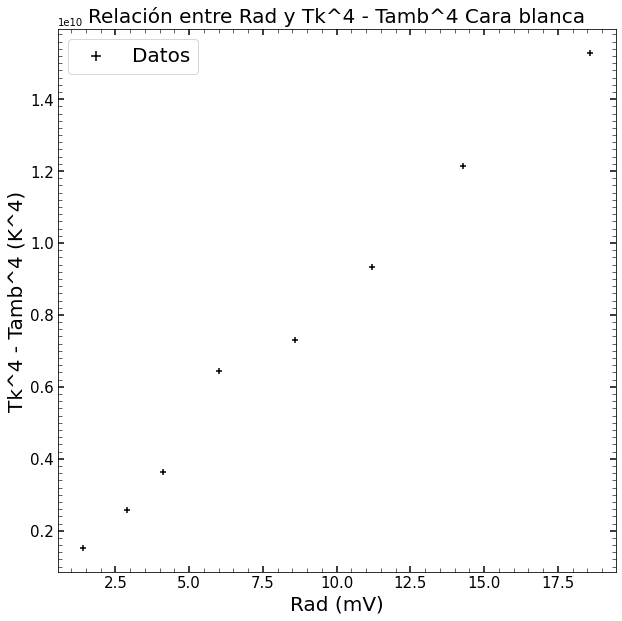

In [26]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(datos_cara_blanca['Rad'], datos_cara_blanca['Tk^4 - Tamb^4'], marker='+', color='black', s=30, label='Datos')
ax.set_title('Relación entre Rad y Tk^4 - Tamb^4 Cara blanca', fontsize=20)
ax.set_xlabel('Rad (mV)', fontsize=20)
ax.set_ylabel('Tk^4 - Tamb^4 (K^4)', fontsize=20)
ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
              length=6, width=1.5, grid_color='black', grid_alpha=1)

ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(MultipleLocator(200000000))
ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True)
ax.legend(fontsize=20, markerscale=2)

In [71]:
ajuste_cb, _ = curve_fit(ajuste_recta, datos_cara_blanca['Tk^4 - Tamb^4'], datos_cara_blanca['Rad'])
ajuste_cb

print('Valor encontrado para la constante de boltzmann con los datos de la cara blanca: {} W/m^2 K^4'.format(
    boltzmann_mv_w(ajuste_cb)[0]))
print('Error porcentual entre el valor encontrado y el teórico: {}%'.format(
    round(error_boltzmann_exp_teo(boltzmann_mv_w(ajuste_cb), const.sigma_sb.value)[0], 3)
))

Valor encontrado para la constante de boltzmann con los datos de la cara blanca: 5.349e-08 W/m^2 K^4
Error porcentual entre el valor encontrado y el teórico: 5.668%


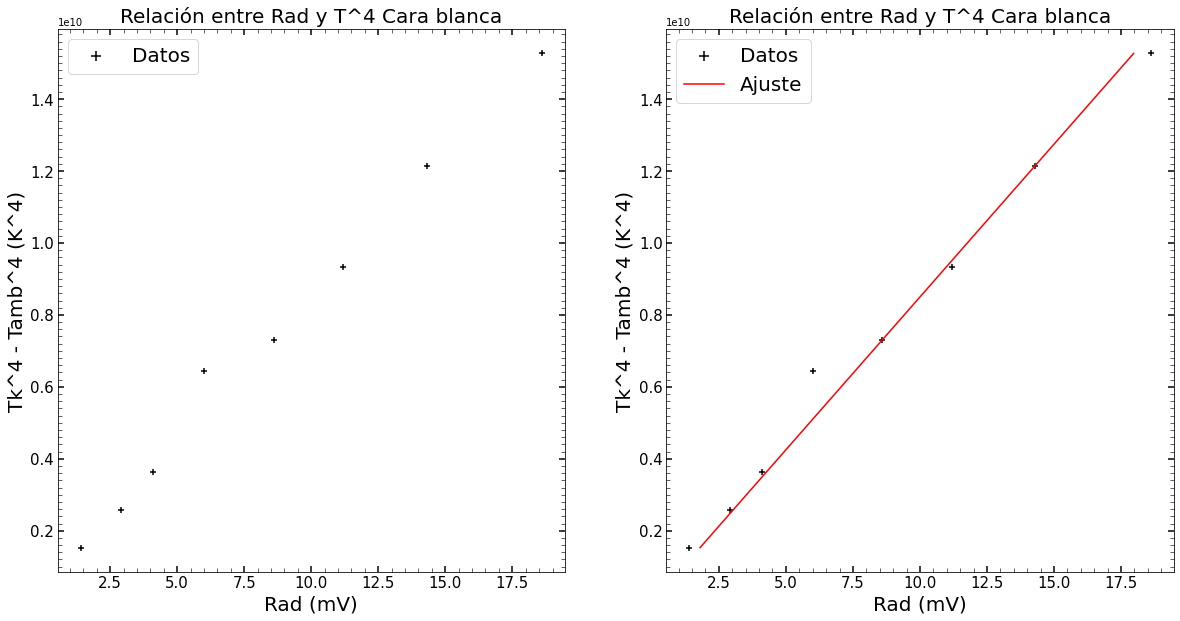

In [73]:
temp_linspace = np.linspace(min(datos_cara_blanca['Tk^4 - Tamb^4']), max(datos_cara_blanca['Tk^4 - Tamb^4']), 100)

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax.scatter(datos_cara_blanca['Rad'], datos_cara_blanca['Tk^4 - Tamb^4'], marker='+', color='black', s=30, label='Datos')
ax.set_title('Relación entre Rad y T^4 Cara blanca', fontsize=20)
ax.set_xlabel('Rad (mV)', fontsize=20)
ax.set_ylabel('Tk^4 - Tamb^4 (K^4)', fontsize=20)
ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
              length=6, width=1.5, grid_color='black', grid_alpha=1)

ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(MultipleLocator(200000000))
ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True)
ax.legend(fontsize=20, markerscale=2)

ax2.scatter(datos_cara_blanca['Rad'], datos_cara_blanca['Tk^4 - Tamb^4'], marker='+', color='black', s=30, label='Datos')
ax2.plot(recta(temp_linspace, ajuste_cb), temp_linspace,c='red', label='Ajuste')
ax2.set_title('Relación entre Rad y T^4 Cara blanca', fontsize=20)
ax2.set_xlabel('Rad (mV)', fontsize=20)
ax2.set_ylabel('Tk^4 - Tamb^4 (K^4)', fontsize=20)
ax2.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
              length=6, width=1.5, grid_color='black', grid_alpha=1)

ax2.xaxis.set_minor_locator(MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(MultipleLocator(200000000))
ax2.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True)
ax2.legend(fontsize=20, markerscale=2)

In [74]:
spear1 = stats.spearmanr(datos_cara_blanca['Rad'], recta(datos_cara_blanca['Tk^4 - Tamb^4'], ajuste_cb))[0]
pear1 = stats.pearsonr(datos_cara_blanca['Rad'], recta(datos_cara_blanca['Tk^4 - Tamb^4'], ajuste_cb))[0]
print("Correlacion de Spearman: {} \nCorrelacion de Pearson: {}".format(
    spear1, pear1
))

Correlacion de Spearman: 1.0 
Correlacion de Pearson: 0.9955247205103569
